In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [2]:
train_df = pd.read_csv('D:\\ML\\ECG CLASSIFICATION\\mitbih_train.csv\\mitbih_train.csv',header=None)
test_df = pd.read_csv('D:\\ML\\ECG CLASSIFICATION\\mitbih_test.csv\\mitbih_test.csv',header=None)

In [3]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
target_column_index = train_df.shape[1] - 1
class_labels = train_df[target_column_index].unique()

class_names = {
    0: "Normal Beats",
    1: "Supraventricular Ectopy Beats",
    2: "Ventricular Ectopy Beats",
    3: "Fusion Beats",
    4: "Unclassifiable Beats"
}

for label in class_labels:
    print(f"Class label {label}: {class_names[label]}")

Class label 0.0: Normal Beats
Class label 1.0: Supraventricular Ectopy Beats
Class label 2.0: Ventricular Ectopy Beats
Class label 3.0: Fusion Beats
Class label 4.0: Unclassifiable Beats


In [6]:
print("Columns and their NaN percentages:")
null_col = train_df.isna().mean() * 100
print(null_col)

Columns and their NaN percentages:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
183    0.0
184    0.0
185    0.0
186    0.0
187    0.0
Length: 188, dtype: float64


In [7]:
train_df[187]=train_df[187].astype(float)
equilibre = train_df[187].value_counts()
print(equilibre)

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [8]:
test_df[187]=test_df[187].astype(float)
equilibre = test_df[187].value_counts()
print(equilibre)

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [11]:
train_df.mean()

0      0.890360
1      0.758160
2      0.423972
3      0.219104
4      0.201127
         ...   
183    0.003471
184    0.003221
185    0.002945
186    0.002807
187    0.473376
Length: 188, dtype: float64

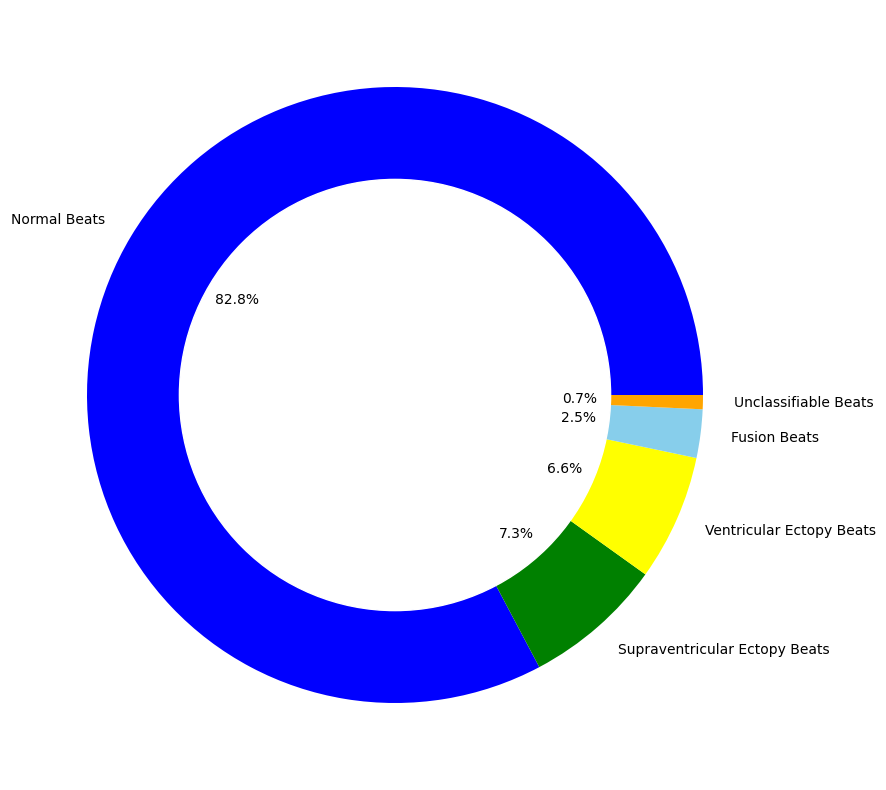

In [12]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], colors=['Blue','Green','Yellow','Skyblue','Orange'],autopct='%1.1f%%', textprops={'color': 'black'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [13]:
import seaborn as sns

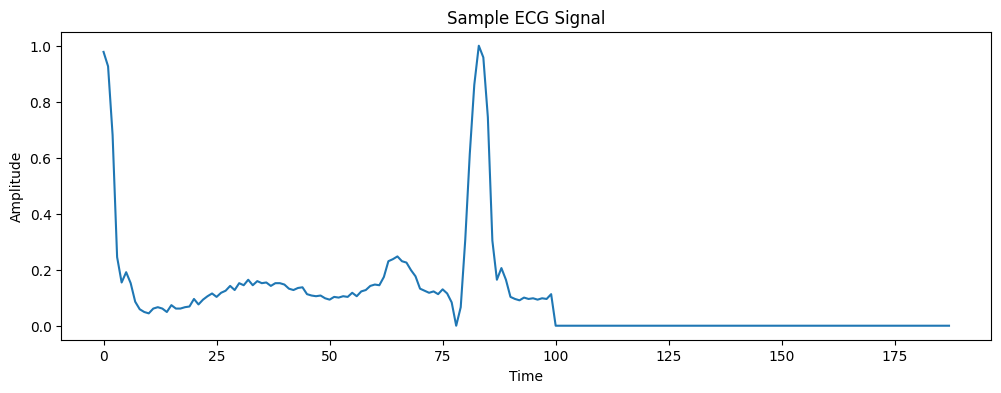

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(train_df.iloc[0, :])  # Plot first row
plt.title("Sample ECG Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


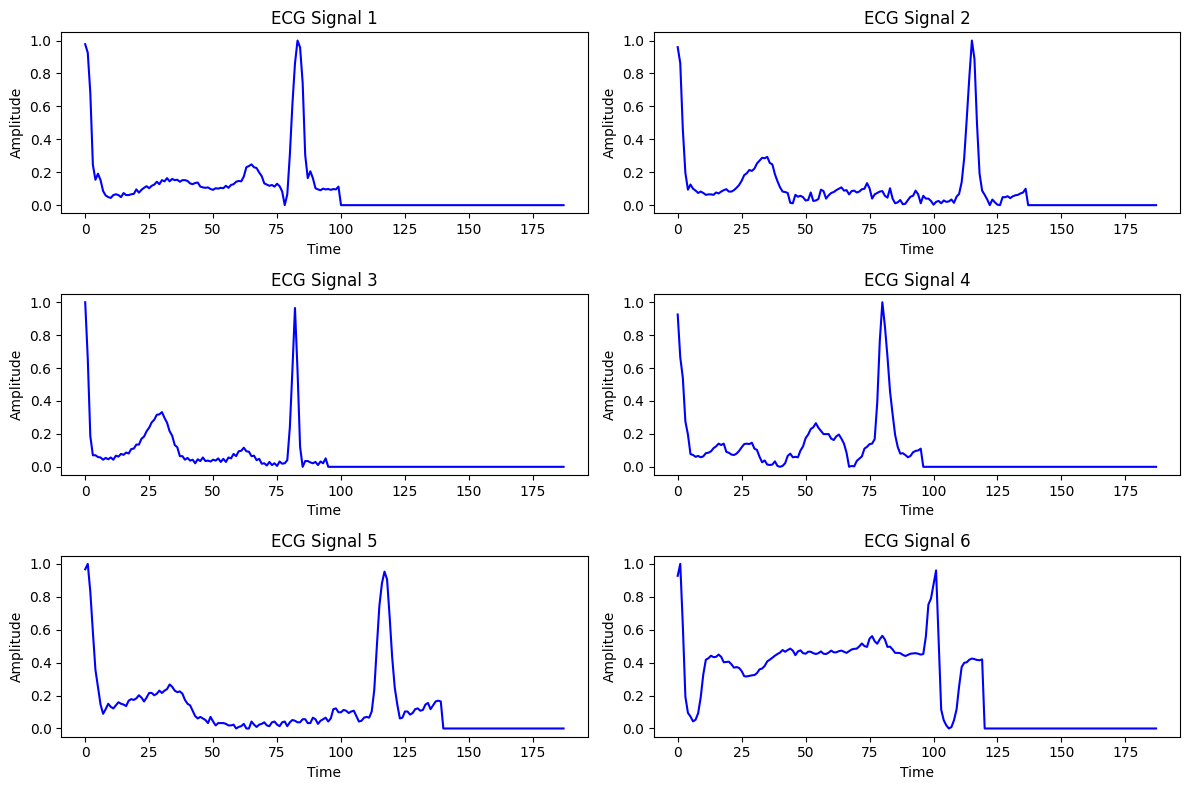

In [15]:
plt.figure(figsize=(12, 8))  # Set figure size

for i in range(6):  # Loop through the first 6 ECG signals
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns layout
    plt.plot(train_df.iloc[i, :], color='b')
    plt.title(f"ECG Signal {i+1}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.tight_layout()  # Adjust spacing
plt.show()



# Base paper Implementation

### Normalizing the data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(train_df.iloc[:, :-1])  # Exclude label column
x_test = scaler.transform(test_df.iloc[:, :-1])
y_train = train_df.iloc[:, -1]  # Assuming last column is the label
y_test = test_df.iloc[:, -1]


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [18]:
# Reshape input to be 3D for LSTM: (samples, timesteps, features)
x_train = np.expand_dims(x_train, axis=1)  # Shape: (samples, 1, features)
x_test = np.expand_dims(x_test, axis=1)

# Convert labels to categorical (if it's a multi-class problem)
num_classes = len(np.unique(y_train))  # Find the number of unique classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [19]:
# Define LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, x_train.shape[2])),  # LSTM layer
    Dropout(0.3),  # Prevent overfitting
    LSTM(32),  # Another LSTM layer
    Dense(16, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation='softmax')  # Output layer with softmax for classification
])

C:\Users\Jannesh_OP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9111 - loss: 0.3593 - val_accuracy: 0.9611 - val_loss: 0.1438
Epoch 2/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9610 - loss: 0.1410 - val_accuracy: 0.9676 - val_loss: 0.1155
Epoch 3/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9665 - loss: 0.1183 - val_accuracy: 0.9717 - val_loss: 0.1025
Epoch 4/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9700 - loss: 0.1050 - val_accuracy: 0.9712 - val_loss: 0.0994
Epoch 5/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9704 - loss: 0.1013 - val_accuracy: 0.9726 - val_loss: 0.0961
Epoch 6/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9707 - loss: 0.0977 - val_accuracy: 0.9746 - val_loss: 0.0928
Epoch 7/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9749 - loss: 0.0881 - val_accuracy: 0.9763 - val_loss: 0.0857
Epoch 8/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9761 - loss: 0.0835 -

In [22]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.9935 - loss: 0.0254
Test Accuracy: 0.9796


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Get predictions
y_pred = model.predict(x_test)  # Get probability outputs
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot back to labels

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [25]:
# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
cr = classification_report(y_true, y_pred_classes, digits=4)

In [26]:
# Print Classification Report
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0     0.9836    0.9954    0.9895     18118
           1     0.9126    0.6763    0.7769       556
           2     0.9509    0.9358    0.9433      1448
           3     0.8296    0.6914    0.7542       162
           4     0.9893    0.9751    0.9821      1608

    accuracy                         0.9796     21892
   macro avg     0.9332    0.8548    0.8892     21892
weighted avg     0.9789    0.9796    0.9788     21892



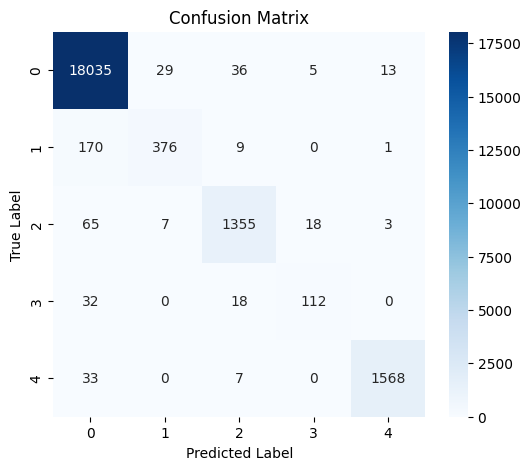

In [27]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [28]:
# Get model predictions
y_pred = model.predict(x_test)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot back to class labels

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step


In [29]:
# Convert results into a DataFrame
results_df = pd.DataFrame({"Actual": y_true, "Predicted": y_pred_classes})

# Display first few results
print(results_df.head(10))  # Check first 10 samples


   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


In [30]:
# Find misclassified examples
misclassified = results_df[results_df["Actual"] != results_df["Predicted"]]

# Print misclassified samples
print("\nMisclassified Samples:")
print(misclassified)



Misclassified Samples:
       Actual  Predicted
287         0          2
345         0          2
384         0          1
659         0          1
947         0          4
...       ...        ...
21618       4          0
21826       4          0
21832       4          0
21835       4          0
21855       4          0

[446 rows x 2 columns]


In [31]:
results_df.shape

(21892, 2)

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step


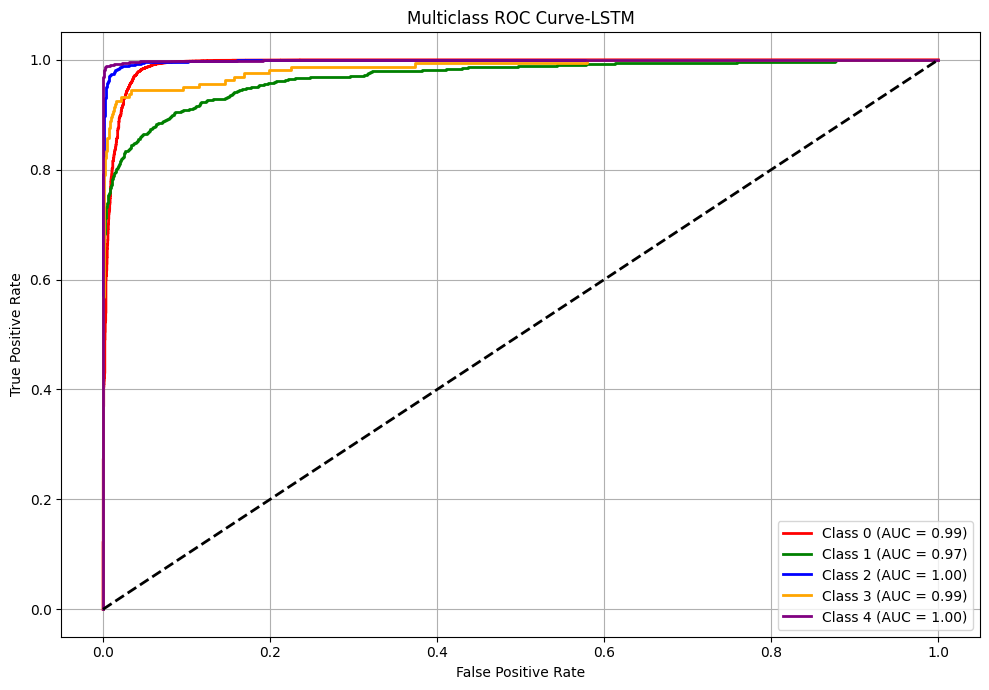

In [32]:
lstm_proba = model.predict(x_test)
my_labels=[0,1,2,3,4]
y_test_bin=label_binarize(y_test, classes=my_labels)

fpr = dict()
tpr = dict()
roc = dict()

#Calculation of ROC and AUC for each Class
for i in range(len(my_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], lstm_proba[:, i])
    roc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 7))
colors = cycle(['red', 'green', 'blue', 'orange', 'purple'])

for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {my_labels[i]} (AUC = {roc[i]:.2f})')

# Diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve-LSTM')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()